#  Retrieve and load the Olivetti faces dataset

In [11]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import numpy as np
faces,labels = fetch_olivetti_faces(shuffle = True,return_X_y = True,random_state =43)

In [12]:
print(faces.shape)
print(labels.shape)

(400, 4096)
(400,)


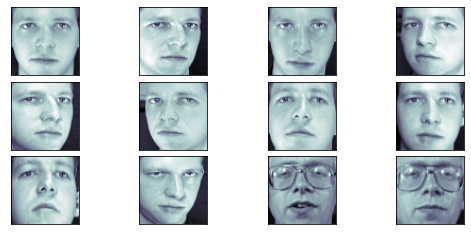

In [13]:
faces_image = np.load('olivetti_faces.npy')

# show dataset.
fig, axes = plt.subplots(3, 4, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces_image[i], cmap='bone')

## Splitting the data with test size 20 percent and then splitting the test data further to test and validation set 

In [14]:
from sklearn.model_selection import train_test_split
faces_train, faces_rest, labels_train, labels_rest = train_test_split(faces,labels, test_size=0.2,stratify=labels)

In [15]:
faces_val, faces_test, labels_val, labels_test = train_test_split(faces_rest,labels_rest,test_size=0.5)

In [16]:
print(faces_train.shape)
print(faces_rest.shape)
print(faces_val.shape)
print(faces_test.shape)
print(labels_train.shape)
print(labels_rest.shape)
print(labels_val.shape)
print(labels_test.shape)

(320, 4096)
(80, 4096)
(40, 4096)
(40, 4096)
(320,)
(80,)
(40,)
(40,)


In [17]:
faces_train

array([[0.15289256, 0.18181819, 0.2520661 , ..., 0.14049587, 0.1322314 ,
        0.12396694],
       [0.54545456, 0.58264464, 0.59090906, ..., 0.58264464, 0.16528925,
        0.1694215 ],
       [0.5289256 , 0.55785125, 0.57438016, ..., 0.4752066 , 0.47933885,
        0.4752066 ],
       ...,
       [0.5123967 , 0.57024795, 0.59917355, ..., 0.15289256, 0.14876033,
        0.16115703],
       [0.1694215 , 0.57024795, 0.8719008 , ..., 0.10743801, 0.10330579,
        0.10743801],
       [0.37603307, 0.40082645, 0.41322315, ..., 0.607438  , 0.7107438 ,
        0.6487603 ]], dtype=float32)

## Using k-fold cross validation, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

In [19]:
#clf=ensemble.RandomForestClassifier()

clf = LogisticRegression(max_iter=300,solver ='liblinear')

In [20]:
clf.fit(faces_train, labels_train)

LogisticRegression(max_iter=300, solver='liblinear')

In [21]:
kfold=KFold(n_splits=5, random_state=None, shuffle=False)
crossValidation = cross_val_score(clf,faces_val,labels_val, cv=kfold)
print("-------Cross validaiton-------",crossValidation)
print("\n--------Mean-------",crossValidation.mean())

-------Cross validaiton------- [0.25  0.5   0.25  0.125 0.375]

--------Mean------- 0.3


In [23]:
from sklearn.metrics import confusion_matrix,silhouette_score,accuracy_score
labels_pred=clf.predict(faces_val)
print('Accuracy: {}'.format(accuracy_score(labels_val, labels_pred)))
print("--------Confusion matrix:--------",confusion_matrix(labels_val, labels_pred))


Accuracy: 0.95
--------Confusion matrix:-------- [[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 

## Using K-Means to reduce the dimensionality of the set: 

In [26]:
km = KMeans(n_clusters=2, random_state=43).fit(faces_train)
#
# Fit the KMeans model
#
km_pred = km.predict(faces_test)
#
# Calculate Silhoutte Score
#
score = silhouette_score(faces_test, km_pred, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.204


In [28]:
km.score(faces_test)

-2721.9560546875

In [29]:
km.cluster_centers_

array([[0.35423756, 0.3684168 , 0.39624858, ..., 0.35618213, 0.36610758,
        0.3613677 ],
       [0.41485327, 0.4556638 , 0.50684285, ..., 0.3057472 , 0.29372963,
        0.29314202]], dtype=float32)

## Use the silhouette score approach to choose the number of clusters

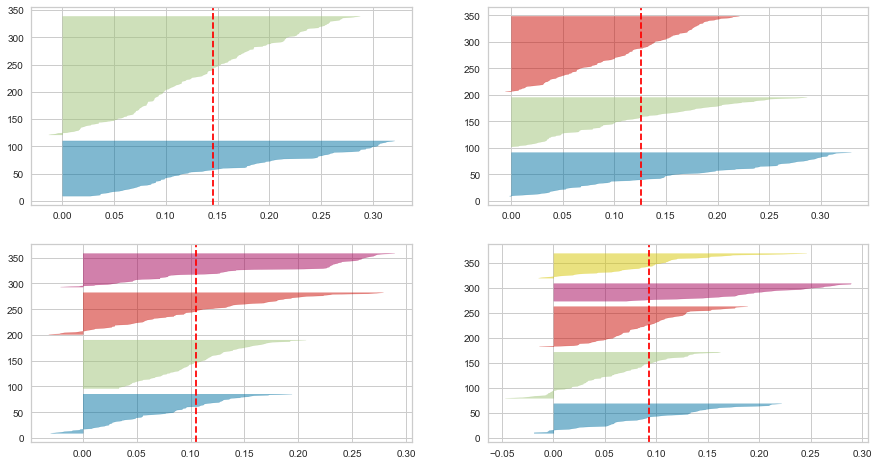

In [30]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=43)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(faces_train)

1. The value of 2 and 3 for n_clusters looks to be the optimal one. The silhouette score for each cluster is above average silhouette scores. 
2. Also, the fluctuation in size is similar. 
3. The thickness of the silhouette plot representing each cluster also is a deciding point. 
4. For the plot with n_cluster 3 (top right), the thickness is more uniform than the plot with n_cluster as 2 (top left) with one cluster thickness much more than the other. 
5. Thus, one can select the optimal number of clusters as 3

## training the classifier with K-means clusters =3

In [32]:
km = KMeans(n_clusters=3, random_state=43).fit(faces_train)
km_predict = km.predict(faces_test)
kfold=KFold(n_splits=3, shuffle=True)
crossValidation = cross_val_score(clf,faces_test,km_predict, cv=kfold)
print("-------Cross validaiton-------",crossValidation)
print("\n--------Mean-------",crossValidation.mean())

-------Cross validaiton------- [0.78571429 0.76923077 0.84615385]

--------Mean------- 0.8003663003663003


In [33]:
labels_test_pred=clf.predict(faces_test)
print('Accuracy: {}'.format(accuracy_score(labels_test, labels_test_pred)))
print("--------Confusion matrix:--------",confusion_matrix(labels_test, labels_test_pred))

Accuracy: 1.0
--------Confusion matrix:-------- [[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 